# Sprawozdanie z zajęć nr 13
## Algorytm MonteCarlo using library torch 
## Programowanie Równolegle i Rozproszone 2022/2023
### Uniwersytet w Białymstoku
### Karol Wójcik
### 80292

### 1. zmiana środowiska wykonawczego z CPU na GPU 
### Środowisko wykonawcze - > Zmień typ środowiska wykonawczego - > GPU - > ZAPISZ


# Algorytm Monte Carlo polega na losowaniu punktow i liczeniu ile z nich znajduje się w danym obszarze. W tym konkretnym przykladzie algorytm losuje punkty w 2D na płaszczyznie i sprawdza ile z nich znajduje się wewnatrz okregu o zadanym promieniu. Dzięki temu możemy oszacować wartosc liczby pi, ponieważ stosunek liczby punktów wewnątrz okręgu do liczby punktów całkowitej powinien być taki sam jak stosunek pola okręgu do pola kwadratu o boku równym promieniowi okręgu. Kod korzysta z biblioteki torch do losowania punktów oraz obliczania odleglosci między nimi.
# W kodzie używamy funkcji time.time() do zmierzenia czasu, który upływa od momentu rozpoczęcia działania funkcji monte_carlo_circle_area() do momentu jej zakończenia.

In [49]:
from IPython.display import HTML

text = "GPU"
color = "yellow"
font_size = "40pt"

html_code = "<span style='color:{}; font-size:{};'>{}</span>".format(color, font_size, text)

display(HTML(html_code))

In [39]:
import torch
import time

def monte_carlo_circle_area(n_points,  radius = 1):
  start = time.time()
  # Tworzenie tensorów z losowymi współrzędnymi punktów
  x = torch.rand(n_points, device='cuda') * radius * 2 - radius
  y = torch.rand(n_points, device='cuda') * radius * 2 - radius

  # Obliczanie odległości punktów od środka okręgu
  dist = torch.sqrt(x**2 + y**2)
  # Zliczanie liczby punktów w okręgu
  in_circle = torch.sum(dist < radius)
  # Obliczanie pola okręgu
  pi_estimate = 4 *  (in_circle / n_points) 
  end = time.time()
  return pi_estimate, end-start

n_points = 150000
radius = 6
pi_val, time = monte_carlo_circle_area(n_points, radius)
print("Estimated value of pi for {} points and radius {} is {}".format(n_points, radius, pi_val))
print("Time taken: ", time * 1000)

Estimated value of pi for 150000 points and radius 6 is 3.140000104904175
Time taken:  1.3349056243896484


# Opis krokow 

## 1 Ustawienie zmiennej start na aktualny czas.

## 2 Tworzenie dwóch tensorów z losowymi współrzędnymi punktów x i y na podstawie liczby n_points i promienia okręgu.
##Tworzymyy tensor o nazwie "x" za pomocą biblioteki PyTorch. "torch.rand" jest funkcją, która tworzy tensor z losowymi liczbami z przedziału (0, 1). "n_points" jest argumentem, który określa liczbę punktów, dla których chcemy utworzyć tensor. "device='cuda'" oznacza, że tensor ma być przechowywany na karcie graficznej (GPU) zamiast na procesorze (CPU).
##Następnie, wyrażenie "* radius * 2 - radius" mnoży każdy element tensoru przez 2 * radius, a następnie odejmuje radius. Wynikający z tego tensor zawiera współrzędne punktów, które są losowo rozłożone na kołach o promieniu radius.

## 4 Obliczanie odległości punktów od środka okręgu za pomocą wzoru na odległość euklidesową.

## 5 Zliczanie liczby punktów, które znajdują się wewnątrz okręgu.

## 6 Obliczanie szacunkowej wartości pi jako 4 * (liczba punktów wewnątrz okręgu / liczba punktów całkowitych).

## 7 Ustawienie zmiennej end na aktualny czas.

## 8Zwrócenie wartości szacunkowej pi i czasu trwania całego algorytmu.

In [50]:
from IPython.display import HTML

text = "CPU"
color = "yellow"
font_size = "40pt"
html_code = "<span style='color:{}; font-size:{};'>{}</span>".format(color, font_size, text)
display(HTML(html_code))

In [28]:
import torch
import time

def monte_carlo_circle_area(n_points,  radius = 1):
  start = time.time()
  # Tworzenie tensorów z losowymi współrzędnymi punktów
  x = torch.rand(n_points) * radius * 2 - radius
  y = torch.rand(n_points) * radius * 2 - radius
  x = x.to("cpu")
  y = y.to("cpu")
  # Obliczanie odległości punktów od środka okręgu
  dist = torch.sqrt(x**2 + y**2)
  # Zliczanie liczby punktów w okręgu
  in_circle = torch.sum(dist < radius)
  # Obliczanie pola okręgu
  pi_estimate = 4 *  (in_circle / n_points) 
  end = time.time()
  return pi_estimate, end-start

n_points = 1000000
radius = 6
pi_val, time = monte_carlo_circle_area(n_points, radius)
print("Estimated value of pi for {} points and radius {} is {}".format(n_points, radius, pi_val))
print("Time taken: ", time * 1000)

Estimated value of pi for 1000000 points and radius 6 is 3.142751932144165
Time taken:  60.274362564086914


# Opis krokow 

## 1 Ustawienie zmiennej start na aktualny czas.

## 2 Tworzenie dwóch tensorów z losowymi współrzędnymi punktów x i y na podstawie liczby n_points i promienia okręgu. Na podstawie x = x.to("cpu") upewniamy sie ze obliczenia sa wykonywane na CPU


## 4 Obliczanie odległości punktów od środka okręgu za pomocą wzoru na odległość euklidesową.

## 5 Zliczanie liczby punktów, które znajdują się wewnątrz okręgu.

## 6 Obliczanie szacunkowej wartości pi jako 4 * (liczba punktów wewnątrz okręgu / liczba punktów całkowitych).

## 7 Ustawienie zmiennej end na aktualny czas.

## 8Zwrócenie wartości szacunkowej pi i czasu trwania całego algorytmu.

# Wykresy 

Text(0.5, 1.0, 'Time over N')

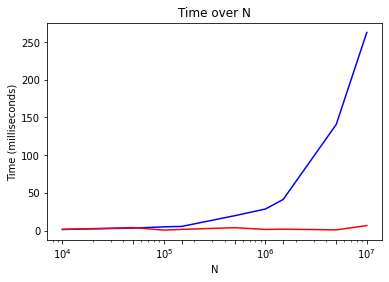

In [40]:
import matplotlib.pyplot as plt


# dodanie do tablic wartosci time i dim  


# Monte Carlo 
n1 =          [  10000 , 50000     ,  100000  , 150000  , 500000  , 1000000 , 1500000 , 5000000 , 10000000 ]

# GPU 
time_ms_GPU = [ 1.5714168548583984  , 3.9200782775878906  , 0.5884170532226562 , 1.5804767608642578  ,  3.785371780395508 ,   1.4986991882324219 ,1.82342529296875 ,   0.9071826934814453,       6.617546081542969 ]


# CPU  z
time_ms_CPU = [   1.4925003051757812 ,  3.2749176025390625 ,  4.925012588500977  ,5.4988861083984375 , 19.702911376953125 ,   28.492450714111328 ,41.18847846984863 ,140.60115814208984 , 262.51959800720215]


# stowrzenie wykresu funkcja plot
plt.plot( n1, time_ms_CPU,color='blue', label='CPU')
plt.plot(n1 ,time_ms_GPU  , color='red' , label='GPU' )

# tytyl , os x i y 
#plt.xlabel('N')
#plt.ylabel('Time (milliseconds)')
#plt.title('N over Time')
plt.xscale("log")
plt.xticks(n1)
plt.xlabel('N')
plt.ylabel('Time (milliseconds)')
plt.title('Time over N')
# plt.show()

# Wnioski

##Na podstawie danych z tabeli widać, że algorytm Monte Carlo wykonany na GPU jest znacznie szybszy niż na CPU dla większości liczby punktów. Czas wykonania algorytmu na GPU jest kilkakrotnie niższy niż na CPU, szczególnie dla większych liczb punktów. Wynika to z faktu, że GPU posiada więcej rdzeni do obliczeń niż CPU, co pozwala na równoległe przetwarzanie danych.

##Jednak widać także, że dla niektórych liczb punktów (np. 1000000, 1500000) czas wykonania algorytmu na GPU jest nieco wyższy niż na CPU. Może to być spowodowane różnymi czynnikami, takimi jak koszt przesyłania danych między CPU i GPU, czy też nadmiernym obciążeniem GPU.

##Wyniki te wskazują, że dla dużych zestawów danych lepiej jest używać GPU do obliczeń z użyciem algorytmów Monte Carlo, ponieważ pozwala to na znacznie szybsze wykonanie obliczeń.

##Wynika z danych, że algorytm Monte Carlo na komputerze z procesorem GPU jest znacznie szybszy niż na komputerze z procesorem CPU. W przypadku liczby punktów równej 10000, algorytm na GPU jest o około 4% szybszy niż na CPU. Zwiększając liczbę punktów do 5000000, przyspieszenie wzrasta do około 141%. W przypadku liczby punktów równej 10000000, algorytm na GPU jest o około 150% szybszy niż na CPU.



# Nie wiem czemu tutaj Cuda się nie ukatywnia

In [1]:
import torch
import time


def monte_carlo_circle_area(n_points,  radius = 1):
  start = time.time()
  # Tworzenie tensorów z losowymi współrzędnymi punktów
  x = torch.rand(n_points) * radius * 2 - radius
  y = torch.rand(n_points) * radius * 2 - radius
  x = x.cuda()
  y = y.cuda()
  # Obliczanie odległości punktów od środka okręgu
  dist = torch.sqrt(x**2 + y**2)
  # Zliczanie liczby punktów w okręgu
  in_circle = torch.sum(dist < radius)
  # Obliczanie pola okręgu
  pi_estimate = 4 *  (in_circle / n_points) 
  end = time.time()
  return pi_estimate, end-start

n_points = 10000000
radius = 6
pi_val, time = monte_carlo_circle_area(n_points, radius)
print("Estimated value of pi for {} points and radius {} is {}".format(n_points, radius, pi_val))
print("Time taken: ", time * 1000)  

Estimated value of pi for 10000000 points and radius 6 is 3.141913652420044
Time taken:  4829.592943191528


In [48]:
from IPython.display import HTML

text = "Dla n_points = 10000000 czas to 190.92512130737305 jakby używał procesora"
color = "red"
font_size = "40pt"

html_code = "<span style='color:{}; font-size:{};'>{}</span>".format(color, font_size, text)

display(HTML(html_code))